
Nome: Gabriel Silvestre Mancini

Nome: Isaac Barella Acras

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from statsmodels.graphics.tsaplots import plot_acf
warnings.filterwarnings('ignore')

## Leitura Dataset Eletricity Data

In [5]:
df_bruto = pd.read_csv('electricity_data.csv')
df_bruto.head(5)

,Unnamed: 0,United States : all sectors,United States : electric utility,United States : independent power producers,United States : all commercial,United States : all industrial,New England : all sectors,New England : electric utility,New England : independent power producers,New England : all commercial,...,Alaska : all sectors,Alaska : electric utility,Alaska : independent power producers,Alaska : all commercial,Alaska : all industrial,Hawaii : all sectors,Hawaii : electric utility,Hawaii : independent power producers,Hawaii : all commercial,Hawaii : all industrial
0,2001-01-01,332493,236467,82269,629,13128,10005,2467,6959,68,...,590,493,20,10,67,925,524,320,--,81
1,2001-02-01,282940,199802,71169,548,11421,8662,2289,5873,65,...,546,423,22,18,84,801,457,293,--,51
2,2001-03-01,300707,211942,75758,553,12454,9506,2061,6882,70,...,587,459,23,18,88,873,573,254,--,46
3,2001-04-01,278079,197499,68356,550,11674,8321,1711,6096,70,...,489,402,17,9,61,836,522,278,--,36
4,2001-05-01,300492,215508,72658,575,11751,8592,1372,6677,72,...,485,395,16,8,65,886,539,310,--,37


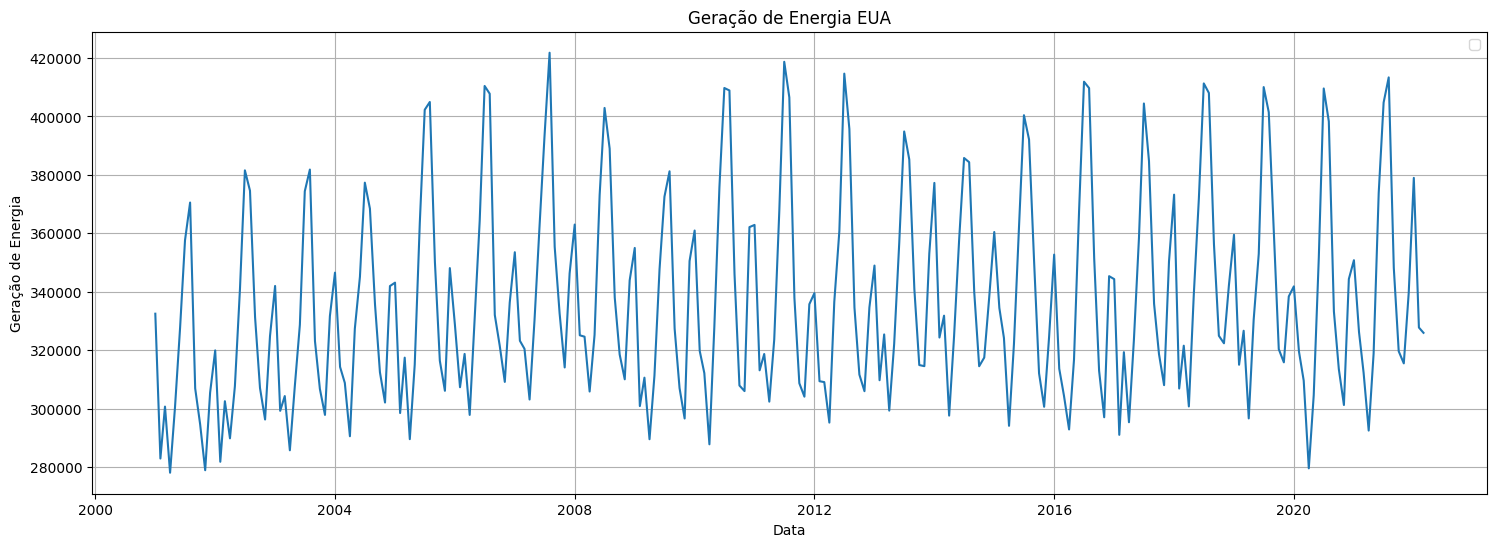

In [6]:
df = df_bruto[['Unnamed: 0', 'United States : all sectors']]

# Converter a coluna 'Unnamed: 0' para o tipo datetime
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])

plt.figure(figsize=(18,6))
plt.title('Geração de Energia EUA')
plt.plot(df['Unnamed: 0'], df['United States : all sectors']) #  Passando a coluna de data como eixo x
plt.ylabel('Geração de Energia')
plt.xlabel('Data')
plt.grid(True)
plt.legend()
plt.show()

## Cálculo e plot média de geração de energia por dia

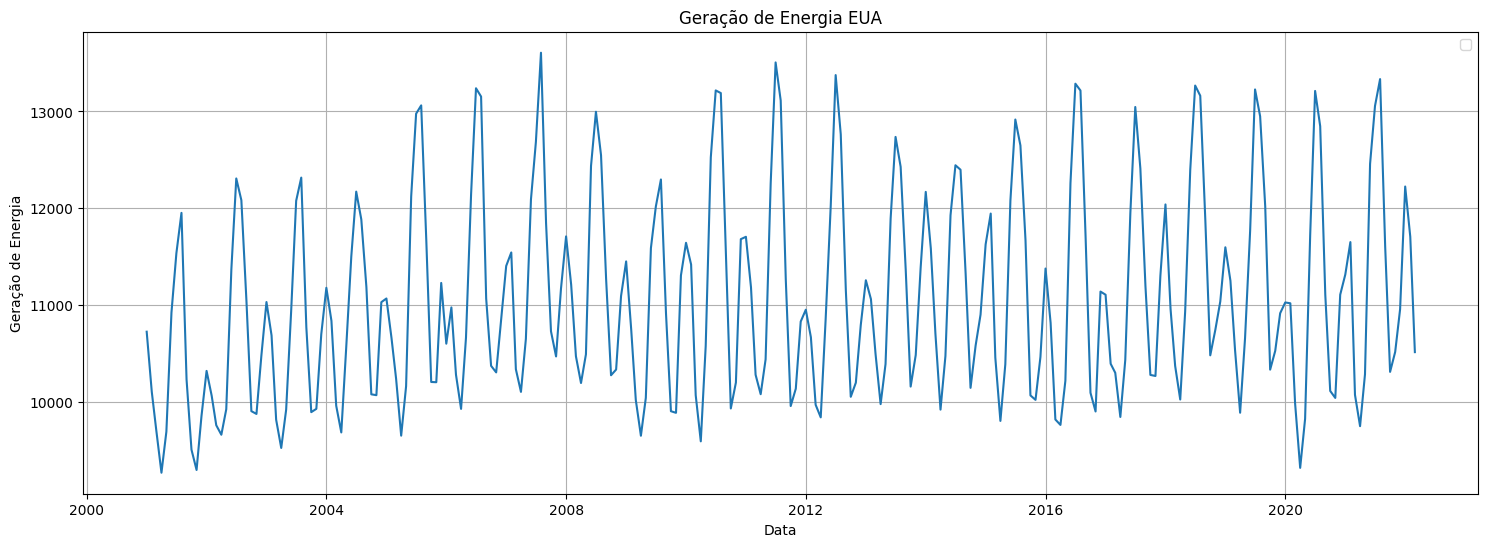

In [7]:
df['days_in_month'] = df['Unnamed: 0'].dt.days_in_month
df['média diária'] = df['United States : all sectors']/df['days_in_month']

plt.figure(figsize=(18,6))
plt.title('Geração de Energia EUA')
plt.plot(df['Unnamed: 0'], df['média diária'])  # Passando a coluna de data como eixo x
plt.ylabel('Geração de Energia')
plt.xlabel('Data')
plt.grid(True)
plt.legend()
plt.show()

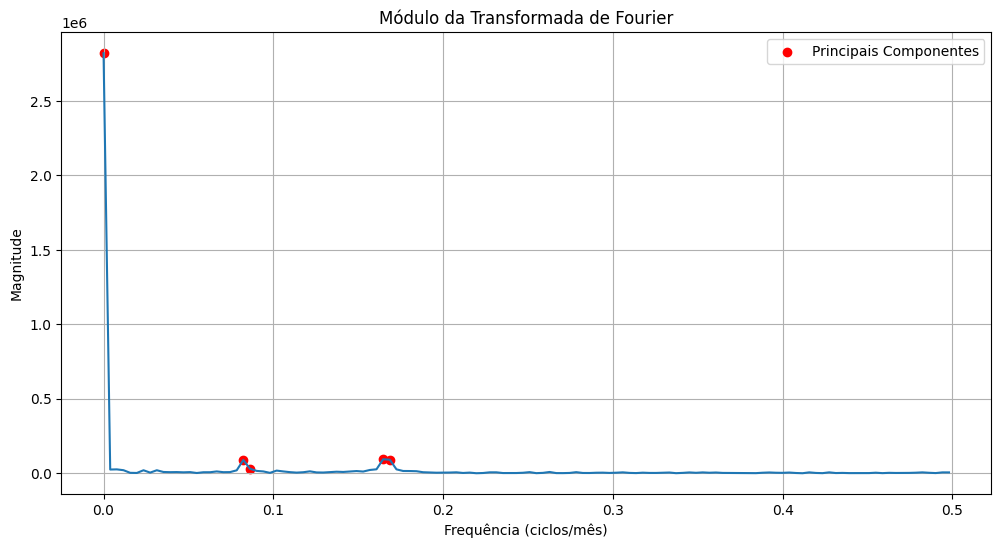

Principais Componentes de Frequência:
Frequência: 0.09 ciclos/mês, Magnitude: 30385.25
Frequência: 0.08 ciclos/mês, Magnitude: 89208.02
Frequência: 0.17 ciclos/mês, Magnitude: 91059.00
Frequência: 0.16 ciclos/mês, Magnitude: 94029.48
Frequência: 0.00 ciclos/mês, Magnitude: 2821237.31


In [8]:
# Calcular a Transformada de Fourier
y = df['média diária'].values
fs = 1
N = len(y)
yf = np.fft.fft(y)
xf = np.fft.fftfreq(N, 1/fs)

positive_frequencies = xf[xf >= 0]
positive_yf = yf[xf >= 0]

# Encontrar os picos de magnitude
magnitude = np.abs(positive_yf)
top_n_indices = np.argpartition(magnitude, -5)[-5:]  # Encontrar os 5 maiores picos
top_n_frequencies = positive_frequencies[top_n_indices]
top_n_magnitudes = magnitude[top_n_indices]

# Plotar o módulo da Transformada de Fourier
plt.figure(figsize=(12, 6))
plt.plot(positive_frequencies, magnitude)
plt.xlabel('Frequência (ciclos/mês)')
plt.ylabel('Magnitude')
plt.title('Módulo da Transformada de Fourier')

# Marcar as principais componentes de frequência
plt.scatter(top_n_frequencies, top_n_magnitudes, color='red', label='Principais Componentes')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir as principais componentes de frequência
print("Principais Componentes de Frequência:")
for freq, mag in zip(top_n_frequencies, top_n_magnitudes):
  print(f"Frequência: {freq:.2f} ciclos/mês, Magnitude: {mag:.2f}")

In [9]:
df['previsao_base'] = df['média diária'].shift(1)
df['previsao_base_sazonal'] = df['média diária'].shift(12)
df['previsao_tendencia'] = df['média diária'].shift(1) + ((df['média diária'].shift(1) - df['média diária'].shift(2))/(2-1))
df['media_movel_4'] = df['média diária'].rolling(window=4).mean()
df['media_movel_6'] = df['média diária'].rolling(window=6).mean()


In [10]:
df.head(10)

,Unnamed: 0,United States : all sectors,days_in_month,média diária,previsao_base,previsao_base_sazonal,previsao_tendencia,media_movel_4,media_movel_6
0,2001-01-01,332493,31,10725.580645,NaN,NaN,NaN,NaN,NaN
1,2001-02-01,282940,28,10105.000000,10725.580645,NaN,NaN,NaN,NaN
2,2001-03-01,300707,31,9700.225806,10105.000000,NaN,9484.419355,NaN,NaN
3,2001-04-01,278079,30,9269.300000,9700.225806,NaN,9295.451613,9950.026613,NaN
4,2001-05-01,300492,31,9693.290323,9269.300000,NaN,8838.374194,9691.954032,NaN
5,2001-06-01,327694,30,10923.133333,9693.290323,NaN,10117.280645,9896.487366,10069.421685
6,2001-07-01,357614,31,11535.935484,10923.133333,NaN,12152.976344,10355.414785,10204.480824
7,2001-08-01,370533,31,11952.677419,11535.935484,NaN,12148.737634,11026.259140,10512.427061
8,2001-09-01,306929,30,10230.966667,11952.677419,NaN,12369.419355,11160.678226,10600.883871
9,2001-10-01,294734,31,9507.548387,10230.966667,NaN,8509.255914,10806.781989,10640.591935


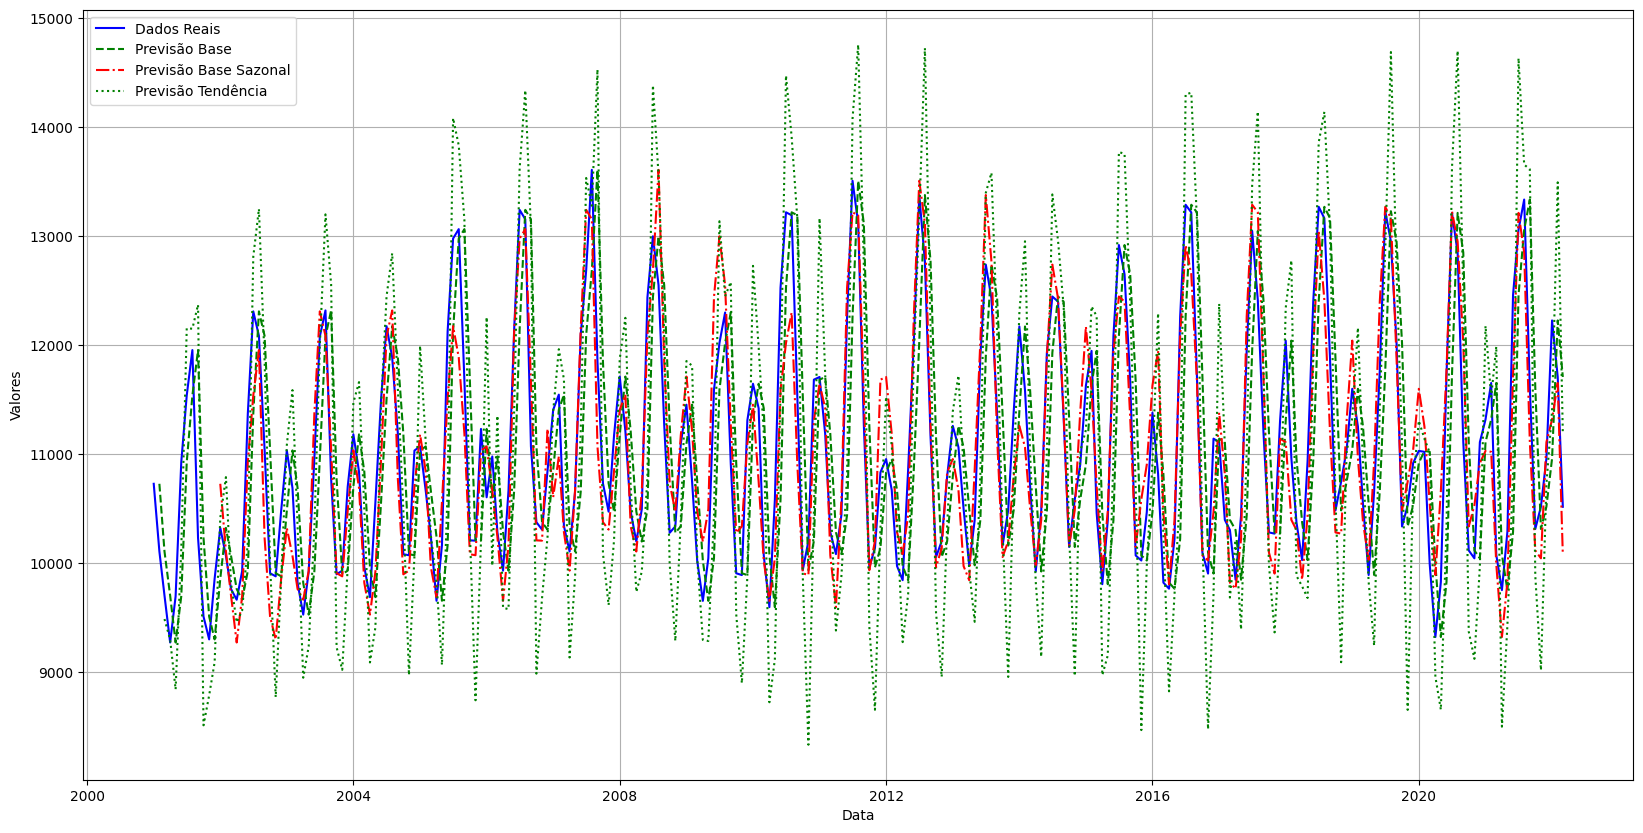

In [11]:
plt.figure(figsize=(20, 10))

plt.plot(df['Unnamed: 0'], df['média diária'], label='Dados Reais', color='blue')
plt.plot(df['Unnamed: 0'], df['previsao_base'], label='Previsão Base', color='green', linestyle='--')
plt.plot(df['Unnamed: 0'], df['previsao_base_sazonal'], label='Previsão Base Sazonal', color='red', linestyle='dashdot')
plt.plot(df['Unnamed: 0'], df['previsao_tendencia'], label='Previsão Tendência', color='green', linestyle='dotted')

plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()

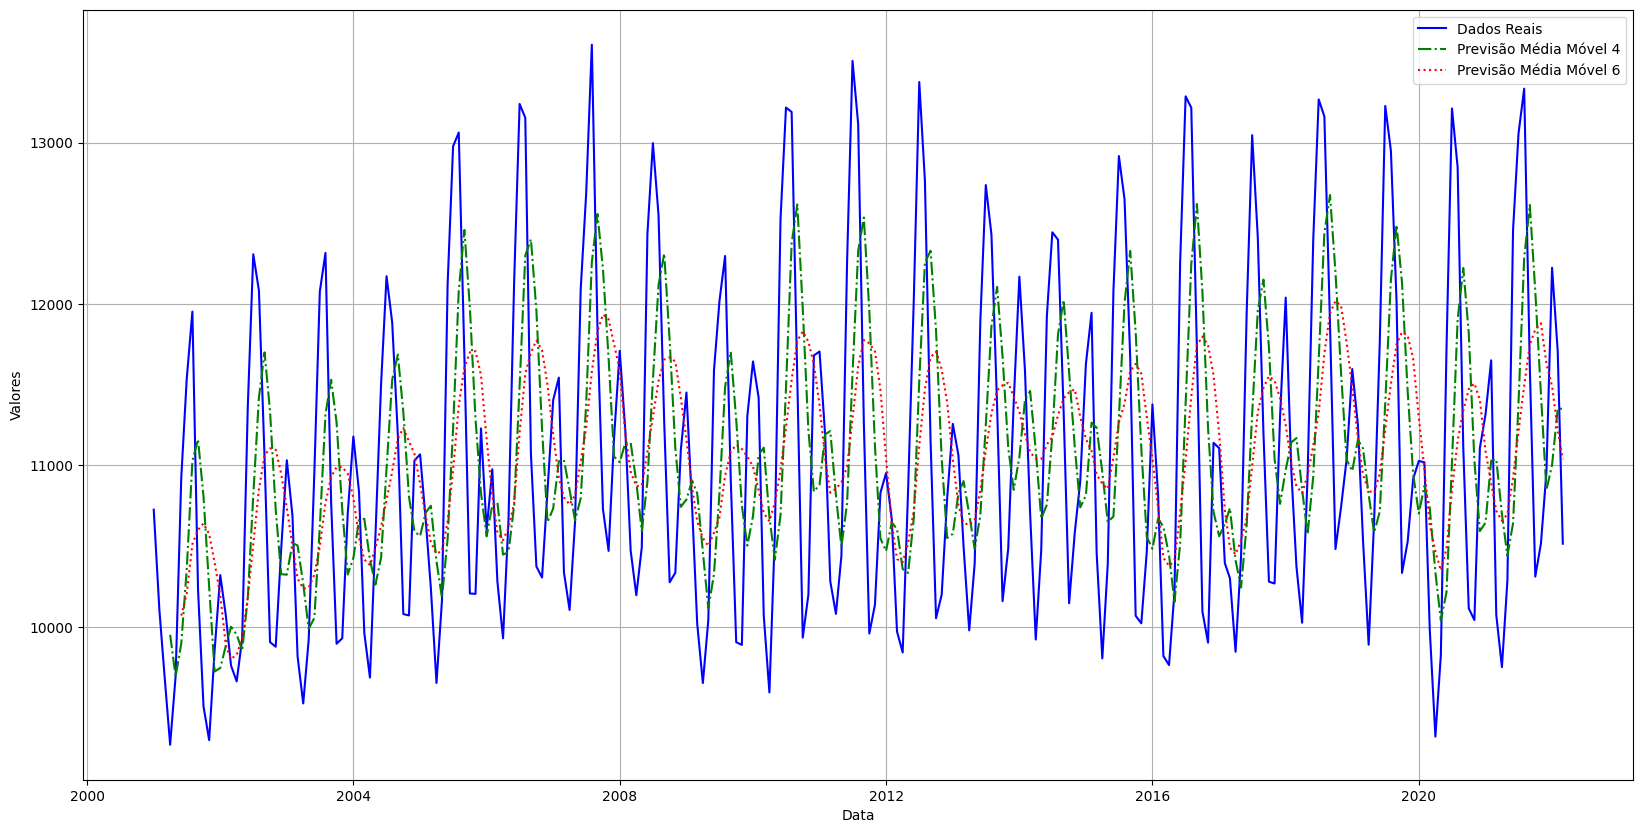

In [12]:
plt.figure(figsize=(20, 10))

plt.plot(df['Unnamed: 0'], df['média diária'], label='Dados Reais', color='blue')
plt.plot(df['Unnamed: 0'], df['media_movel_4'], label='Previsão Média Móvel 4', color='green', linestyle='dashdot')
plt.plot(df['Unnamed: 0'], df['media_movel_6'], label='Previsão Média Móvel 6', color='red', linestyle='dotted')

plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
df['erro_absoluto_base'] = abs(df['média diária'] - df['previsao_base'])
df['erro_absoluto_sazonal'] = abs(df['média diária'] - df['previsao_base_sazonal'])
df['erro_absoluto_tendencia'] = abs(df['média diária'] - df['previsao_tendencia'])
df['erro_absoluto_mm4'] = abs(df['média diária'] - df['media_movel_4'])
df['erro_absoluto_mm6'] = abs(df['média diária'] - df['media_movel_6'])

mae_base = df['erro_absoluto_base'].mean()
mae_sazonal = df['erro_absoluto_sazonal'].mean()
mae_tendencia = df['erro_absoluto_tendencia'].mean()
mae_mm4 = df['erro_absoluto_mm4'].mean()
mae_mm6 = df['erro_absoluto_mm6'].mean()

print(f"MAE Base: {mae_base}")
print(f"MAE Sazonal: {mae_sazonal}")
print(f"MAE Tendência: {mae_tendencia}")
print(f"MAE Média Móvel 4: {mae_mm4}")
print(f"MAE Média Móvel 6: {mae_mm6}")

df['erro_percentual_absoluto_base'] = abs((df['média diária'] - df['previsao_base']) / df['média diária']) * 100
df['erro_percentual_absoluto_sazonal'] = abs((df['média diária'] - df['previsao_base_sazonal']) / df['média diária']) * 100
df['erro_percentual_absoluto_tendencia'] = abs((df['média diária'] - df['previsao_tendencia']) / df['média diária']) * 100
df['erro_percentual_absoluto_mm4'] = abs((df['média diária'] - df['media_movel_4']) / df['média diária']) * 100
df['erro_percentual_absoluto_mm6'] = abs((df['média diária'] - df['media_movel_6']) / df['média diária']) * 100

mape_base = df['erro_percentual_absoluto_base'].mean()
mape_sazonal = df['erro_percentual_absoluto_sazonal'].mean()
mape_tendencia = df['erro_percentual_absoluto_tendencia'].mean()
mape_mm4 = df['erro_percentual_absoluto_mm4'].mean()
mape_mm6 = df['erro_percentual_absoluto_mm6'].mean()

print(f"MAPE Base: {mape_base}")
print(f"MAPE Sazonal: {mape_sazonal}")
print(f"MAPE Tendência: {mape_tendencia}")
print(f"MAPE Média Móvel 4: {mape_mm4}")
print(f"MAPE Média Móvel 6: {mape_mm6}")

MAE Base: 747.1894837742055
MAE Sazonal: 340.20483384874467
MAE Tendência: 825.8988795610574
MAE Média Móvel 4: 834.3717563165421
MAE Média Móvel 6: 828.2630250013242
MAPE Base: 6.71937479768899
MAPE Sazonal: 3.031696552253233
MAPE Tendência: 7.449312037714269
MAPE Média Móvel 4: 7.47712187849023
MAPE Média Móvel 6: 7.3701387080512735


Avaliando apenas os erros, a previsão sazonal considerando a sazonalidade de 12 horas, foi a que teve o melhor desempenho, com um erro absoluto de 340 e um erro médio percentual de 3%.

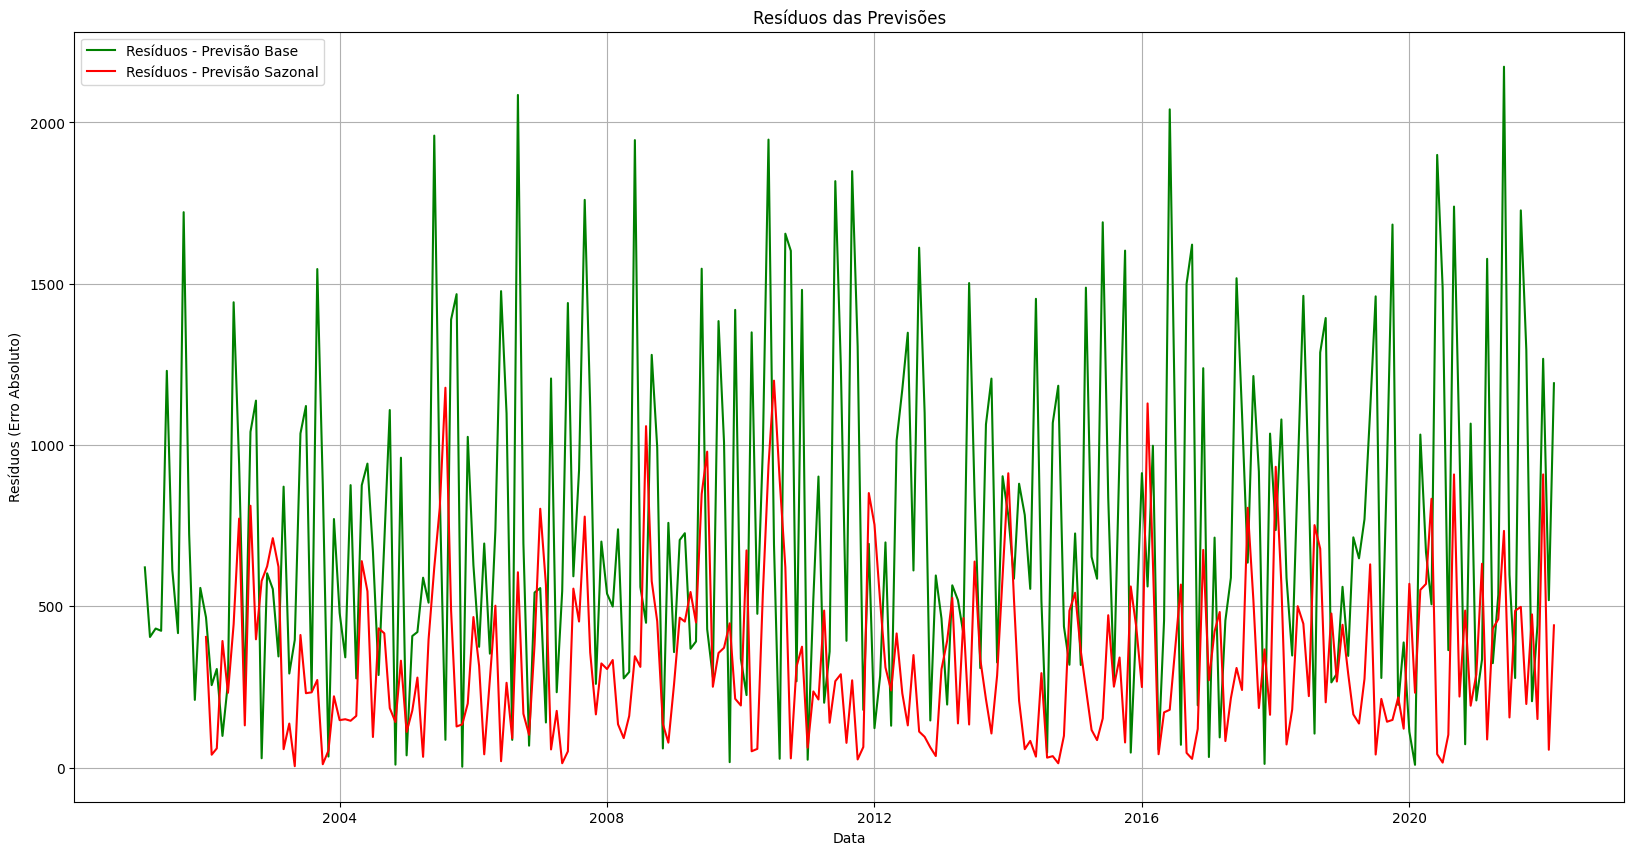

In [14]:
plt.figure(figsize=(20, 10))

plt.plot(df['Unnamed: 0'], df['erro_absoluto_base'], label='Resíduos - Previsão Base', color='green')
plt.plot(df['Unnamed: 0'], df['erro_absoluto_sazonal'], label='Resíduos - Previsão Sazonal', color='red')

plt.xlabel('Data')
plt.ylabel('Resíduos (Erro Absoluto)')
plt.title('Resíduos das Previsões')
plt.legend()
plt.grid(True)
plt.show()

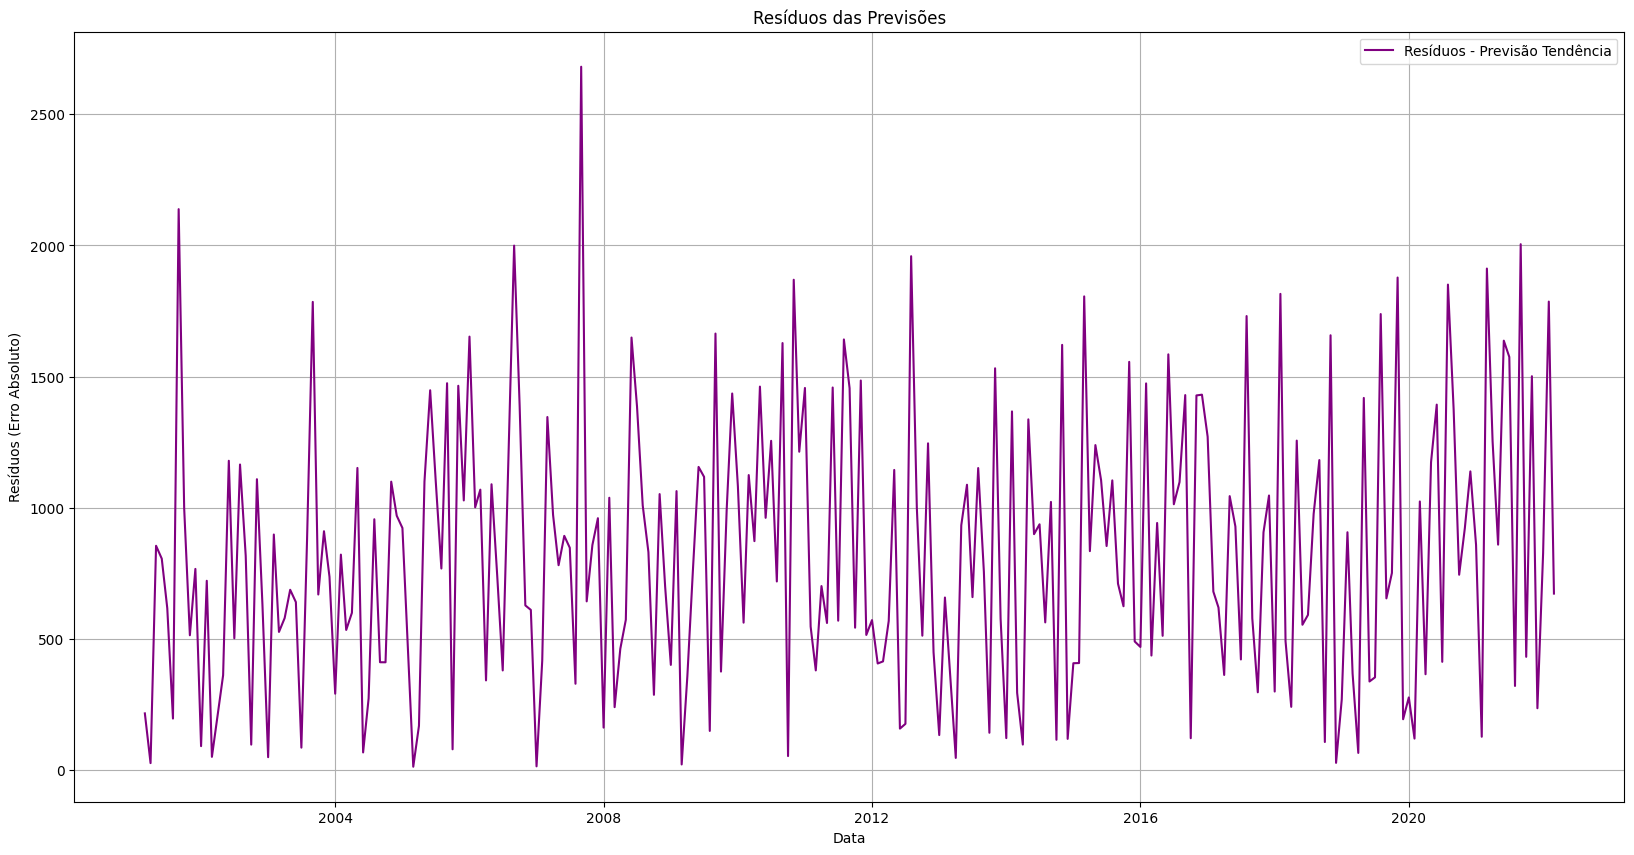

In [15]:
plt.figure(figsize=(20, 10))

plt.plot(df['Unnamed: 0'], df['erro_absoluto_tendencia'], label='Resíduos - Previsão Tendência', color='purple')

plt.xlabel('Data')
plt.ylabel('Resíduos (Erro Absoluto)')
plt.title('Resíduos das Previsões')
plt.legend()
plt.grid(True)
plt.show()

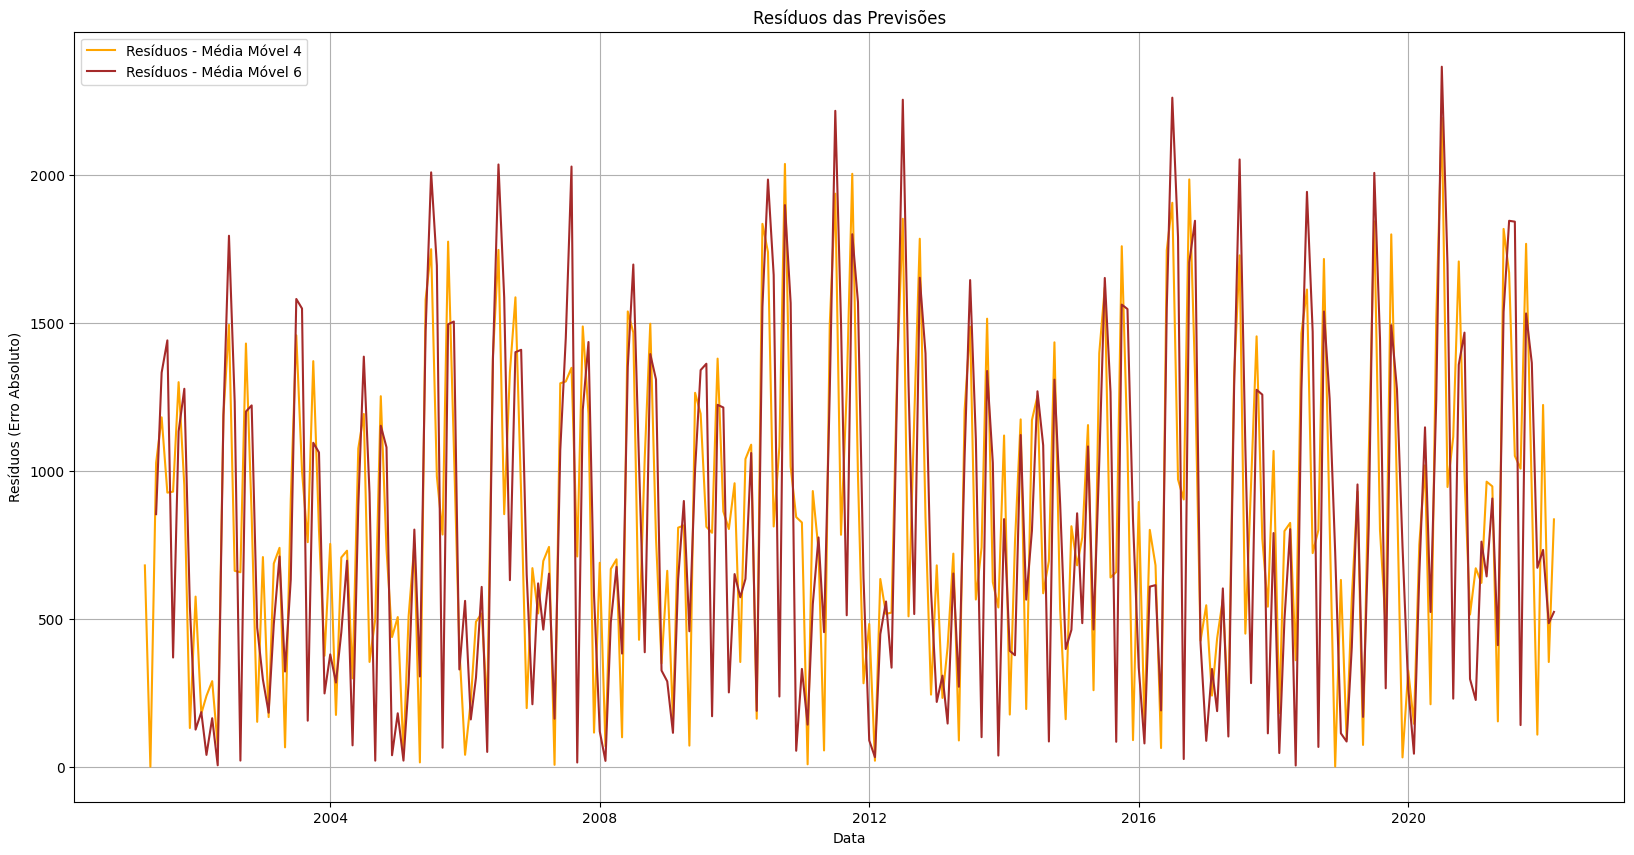

In [16]:
plt.figure(figsize=(20, 10))

plt.plot(df['Unnamed: 0'], df['erro_absoluto_mm4'], label='Resíduos - Média Móvel 4', color='orange')
plt.plot(df['Unnamed: 0'], df['erro_absoluto_mm6'], label='Resíduos - Média Móvel 6', color='brown')

plt.xlabel('Data')
plt.ylabel('Resíduos (Erro Absoluto)')
plt.title('Resíduos das Previsões')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
residuals_base = df['erro_absoluto_base'].dropna()
residuals_sazonal = df['erro_absoluto_sazonal'].dropna()
residuals_tendencia = df['erro_absoluto_tendencia'].dropna()
residuals_mm4 = df['erro_absoluto_mm4'].dropna()
residuals_mm6 = df['erro_absoluto_mm6'].dropna()

mean_residuals_base = np.mean(residuals_base)
std_residuals_base = np.std(residuals_base)

mean_residuals_sazonal = np.mean(residuals_sazonal)
std_residuals_sazonal = np.std(residuals_sazonal)

mean_residuals_tendencia = np.mean(residuals_tendencia)
std_residuals_tendencia = np.std(residuals_tendencia)

mean_residuals_mm4 = np.mean(residuals_mm4)
std_residuals_mm4 = np.std(residuals_mm4)

mean_residuals_mm6 = np.mean(residuals_mm6)
std_residuals_mm6 = np.std(residuals_mm6)

print(f"Mean and Standard Deviation of Residuals - Previsão Base: {mean_residuals_base:.2f}, {std_residuals_base:.2f}")
print(f"Mean and Standard Deviation of Residuals - Previsão Sazonal: {mean_residuals_sazonal:.2f}, {std_residuals_sazonal:.2f}")
print(f"Mean and Standard Deviation of Residuals - Previsão Tendência: {mean_residuals_tendencia:.2f}, {std_residuals_tendencia:.2f}")
print(f"Mean and Standard Deviation of Residuals - Média Móvel 4: {mean_residuals_mm4:.2f}, {std_residuals_mm4:.2f}")
print(f"Mean and Standard Deviation of Residuals - Média Móvel 6: {mean_residuals_mm6:.2f}, {std_residuals_mm6:.2f}")

Mean and Standard Deviation of Residuals - Previsão Base: 747.19, 513.95
Mean and Standard Deviation of Residuals - Previsão Sazonal: 340.20, 256.06
Mean and Standard Deviation of Residuals - Previsão Tendência: 825.90, 518.45
Mean and Standard Deviation of Residuals - Média Móvel 4: 834.37, 517.15
Mean and Standard Deviation of Residuals - Média Móvel 6: 828.26, 596.78


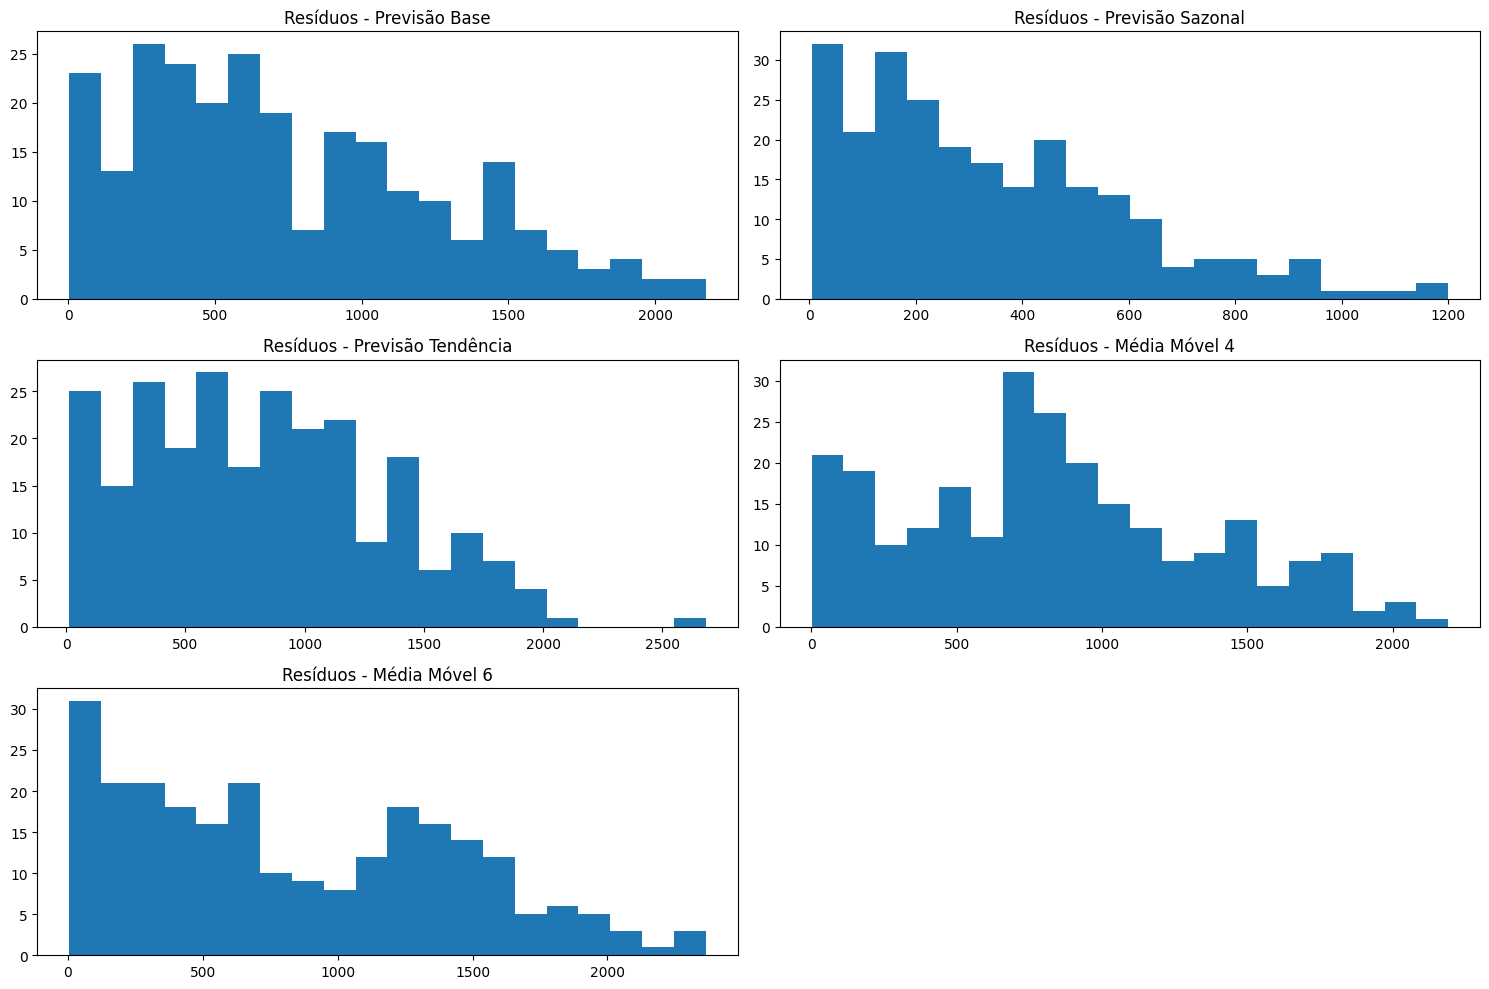

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.hist(residuals_base, bins=20)
plt.title('Resíduos - Previsão Base')

plt.subplot(3, 2, 2)
plt.hist(residuals_sazonal, bins=20)
plt.title('Resíduos - Previsão Sazonal')

plt.subplot(3, 2, 3)
plt.hist(residuals_tendencia, bins=20)
plt.title('Resíduos - Previsão Tendência')

plt.subplot(3, 2, 4)
plt.hist(residuals_mm4, bins=20)
plt.title('Resíduos - Média Móvel 4')

plt.subplot(3, 2, 5)
plt.hist(residuals_mm6, bins=20)
plt.title('Resíduos - Média Móvel 6')

plt.tight_layout()
plt.show()

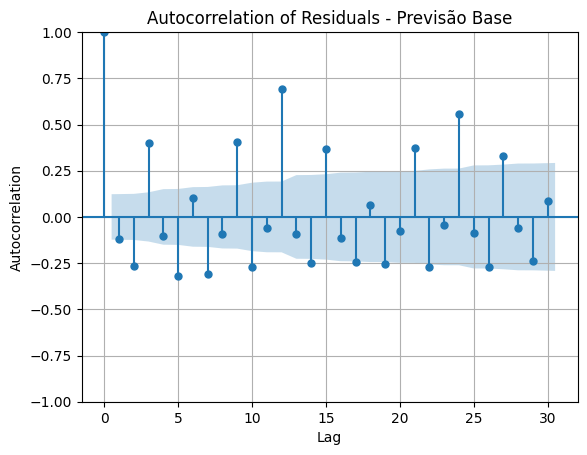

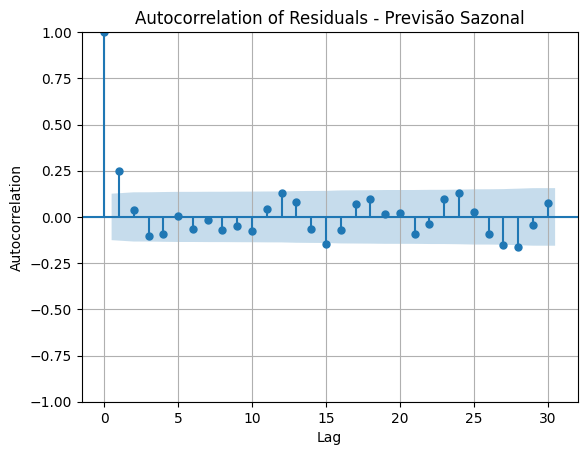

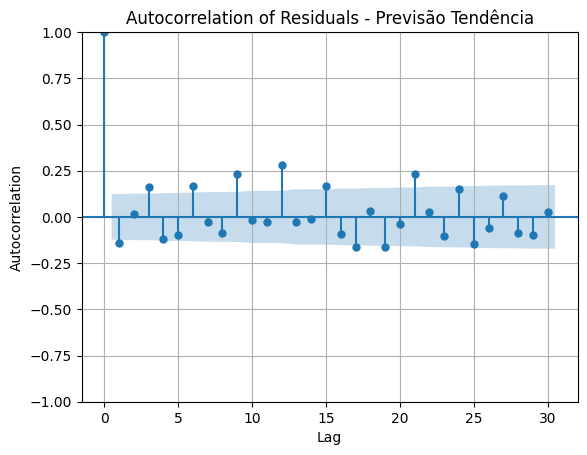

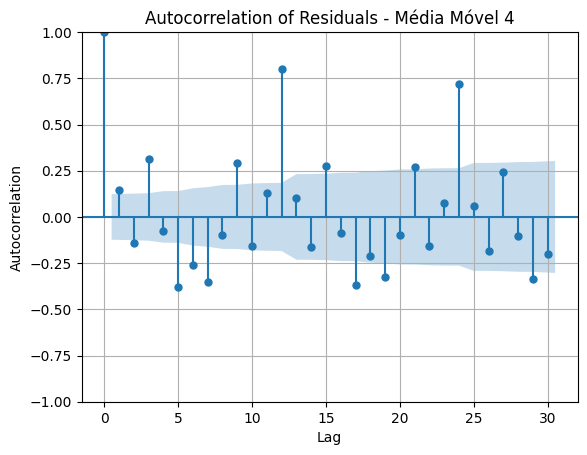

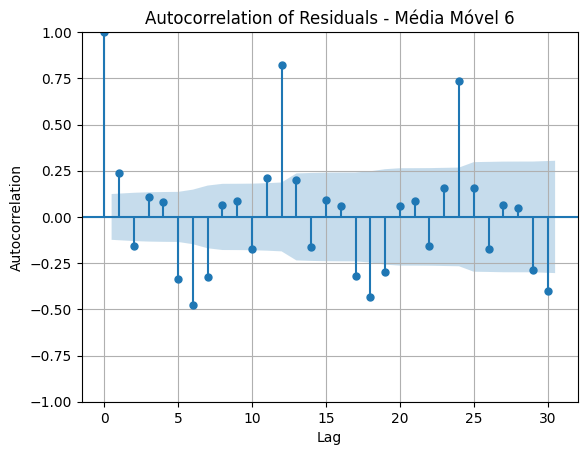

In [21]:
def plot_residual_autocorrelation(residuals, title):
    plot_acf(residuals, lags=30)
    plt.title(title)
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")
    plt.grid(True)
    plt.show()

plot_residual_autocorrelation(residuals_base, 'Autocorrelation of Residuals - Previsão Base')
plot_residual_autocorrelation(residuals_sazonal, 'Autocorrelation of Residuals - Previsão Sazonal')
plot_residual_autocorrelation(residuals_tendencia, 'Autocorrelation of Residuals - Previsão Tendência')
plot_residual_autocorrelation(residuals_mm4, 'Autocorrelation of Residuals - Média Móvel 4')
plot_residual_autocorrelation(residuals_mm6, 'Autocorrelation of Residuals - Média Móvel 6')

Avaliando a distribuição centralidade e autocorrelação dos resíduos, podemos concluir que existem tendências nas previsões e que muita informação relevante está sendo perdida nos resíduos.

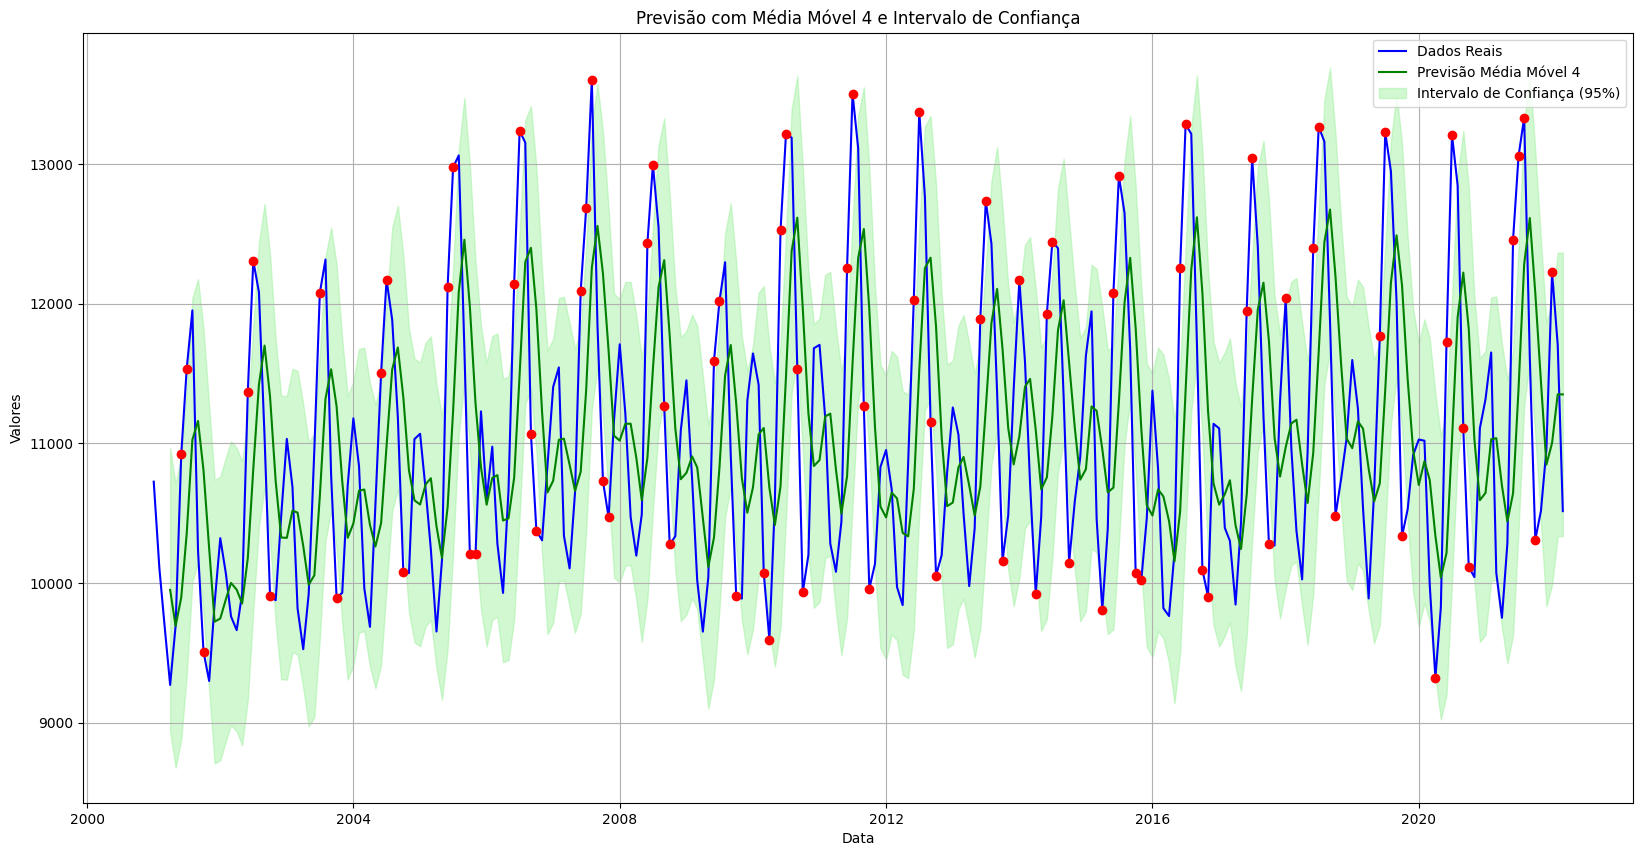

Possíveis anomalias (outliers) detectadas usando média móvel de 4:
    Unnamed: 0  média diária
5   2001-06-01  10923.133333
6   2001-07-01  11535.935484
9   2001-10-01   9507.548387
17  2002-06-01  11367.433333
18  2002-07-01  12307.806452
..         ...           ...
245 2021-06-01  12458.466667
246 2021-07-01  13056.419355
247 2021-08-01  13333.967742
249 2021-10-01  10310.903226
252 2022-01-01  12224.741935

[82 rows x 2 columns]


In [19]:
confidence_level = 0.95
z_score = 1.96

df['upper_bound_mm4'] = df['media_movel_4'] + z_score * df['erro_absoluto_mm4'].std()
df['lower_bound_mm4'] = df['media_movel_4'] - z_score * df['erro_absoluto_mm4'].std()

plt.figure(figsize=(20, 10))
plt.plot(df['Unnamed: 0'], df['média diária'], label='Dados Reais', color='blue')
plt.plot(df['Unnamed: 0'], df['media_movel_4'], label='Previsão Média Móvel 4', color='green')
plt.fill_between(df['Unnamed: 0'], df['lower_bound_mm4'], df['upper_bound_mm4'], color='lightgreen', alpha=0.4, label='Intervalo de Confiança (95%)')

plt.xlabel('Data')
plt.ylabel('Valores')
plt.title('Previsão com Média Móvel 4 e Intervalo de Confiança')
plt.legend()
plt.grid(True)

outliers_mm4 = df[(df['média diária'] > df['upper_bound_mm4']) | (df['média diária'] < df['lower_bound_mm4'])]
plt.scatter(outliers_mm4['Unnamed: 0'], outliers_mm4['média diária'], color='red', label='Anomalias', zorder=2)
plt.show()

print("Possíveis anomalias (outliers) detectadas usando média móvel de 4:")
print(outliers_mm4[['Unnamed: 0', 'média diária']])